<a href="https://colab.research.google.com/github/nada-osama-a/Task3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
df = pd.read_csv("/content/Task.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDF57,NaN,Regular,0.058543,Fruits and Vegetables,168.6448,OUT027,1985,Medium,Tier 3,Supermarket Type3,3408.8960
1,FDN27,20.85,Low Fat,0.039624,Meat,117.2808,OUT049,1999,Medium,Tier 1,Supermarket Type1,1523.3504
2,DRF23,4.61,Low Fat,0.122901,Hard Drinks,174.4396,OUT045,2002,NaN,Tier 2,Supermarket Type1,2616.5940
3,DRE03,19.60,Low Fat,0.024265,Dairy,46.5718,OUT049,1999,Medium,Tier 1,Supermarket Type1,1607.2412
4,FDG31,NaN,Low Fat,0.066352,Meat,65.0826,OUT019,1985,Small,Tier 1,Grocery Store,193.7478
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,DRI01,7.97,Low Fat,0.000000,Soft Drinks,173.7422,OUT045,2002,NaN,Tier 2,Supermarket Type1,2759.0752
8519,FDH10,21.00,Low Fat,0.049264,Snack Foods,195.0478,OUT013,1987,High,Tier 3,Supermarket Type1,1549.9824
8520,FDD16,20.50,Low Fat,0.060848,Frozen Foods,75.0696,OUT010,1998,NaN,Tier 3,Grocery Store,149.1392
8521,NCS53,14.50,Low Fat,0.090286,Health and Hygiene,159.9604,OUT017,2007,NaN,Tier 2,Supermarket Type1,2218.4456


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


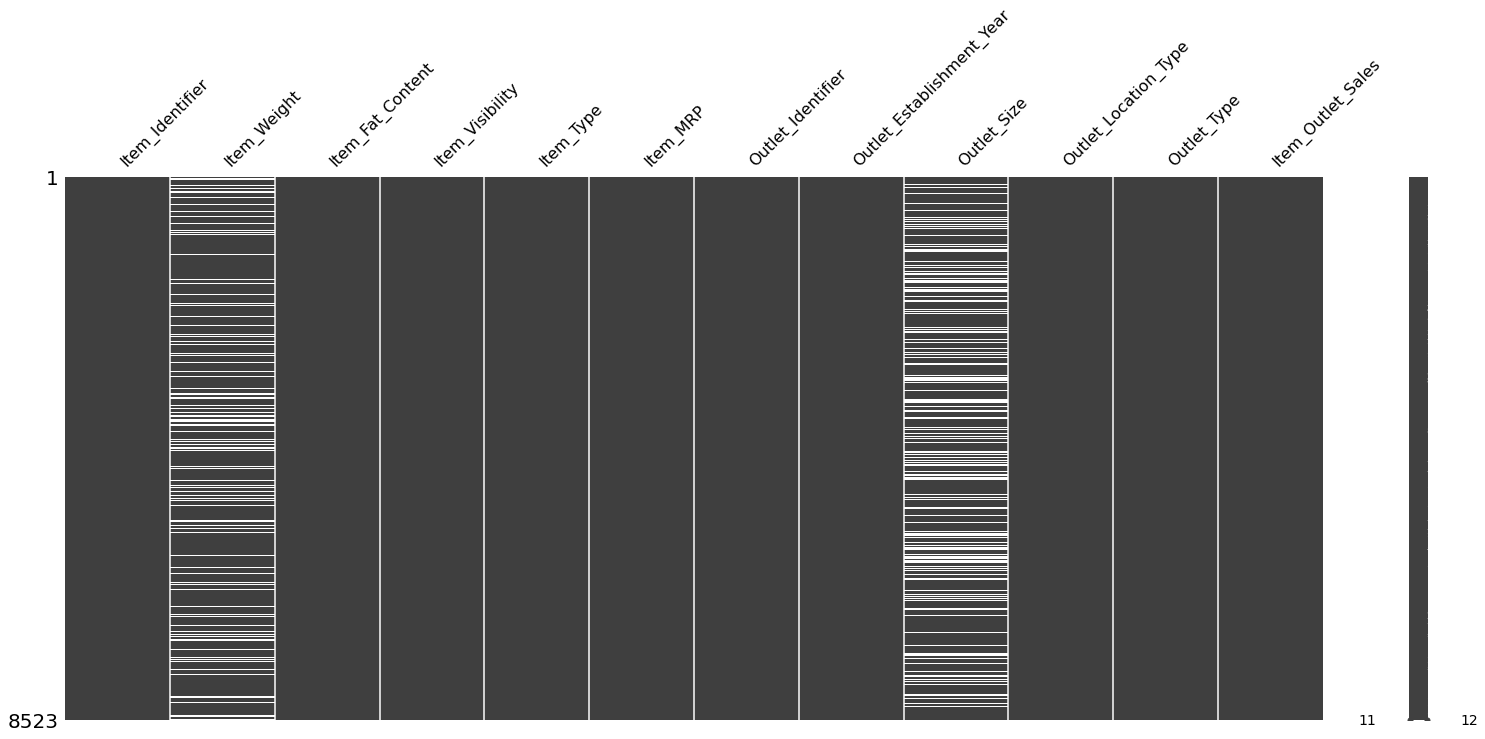

In [5]:
msno.matrix(df)

In [6]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('LF', 'Low Fat')    #naming all the similar data with the same name
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace('reg', 'Regular')


In [7]:
sorteddf = df.sort_values(by = 'Outlet_Establishment_Year', ascending=True)   #sorting the data by its date(year) while ascending = True

In [8]:
sorteddf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDF57,NaN,Regular,0.058543,Fruits and Vegetables,168.6448,OUT027,1985,Medium,Tier 3,Supermarket Type3,3408.8960
3697,DRM37,NaN,Low Fat,0.095931,Soft Drinks,198.5768,OUT027,1985,Medium,Tier 3,Supermarket Type3,6897.6880
3704,FDJ48,NaN,Low Fat,0.056162,Baking Goods,246.9118,OUT027,1985,Medium,Tier 3,Supermarket Type3,5681.2714
3705,FDY55,NaN,Low Fat,0.000000,Fruits and Vegetables,258.3988,OUT019,1985,Small,Tier 1,Grocery Store,256.9988
3706,NCI30,NaN,Low Fat,0.103188,Household,244.3460,OUT019,1985,Small,Tier 1,Grocery Store,246.3460
...,...,...,...,...,...,...,...,...,...,...,...,...
820,DRK01,7.63,Low Fat,0.061313,Soft Drinks,93.3436,OUT018,2009,Medium,Tier 3,Supermarket Type2,1323.6104
3806,FDA11,7.75,Low Fat,0.043415,Baking Goods,93.1436,OUT018,2009,Medium,Tier 3,Supermarket Type2,1418.1540
3801,FDH26,19.25,Regular,0.034841,Canned,141.1496,OUT018,2009,Medium,Tier 3,Supermarket Type2,282.2992
7647,DRQ35,9.30,Low Fat,0.042464,Hard Drinks,121.9388,OUT018,2009,Medium,Tier 3,Supermarket Type2,1114.5492


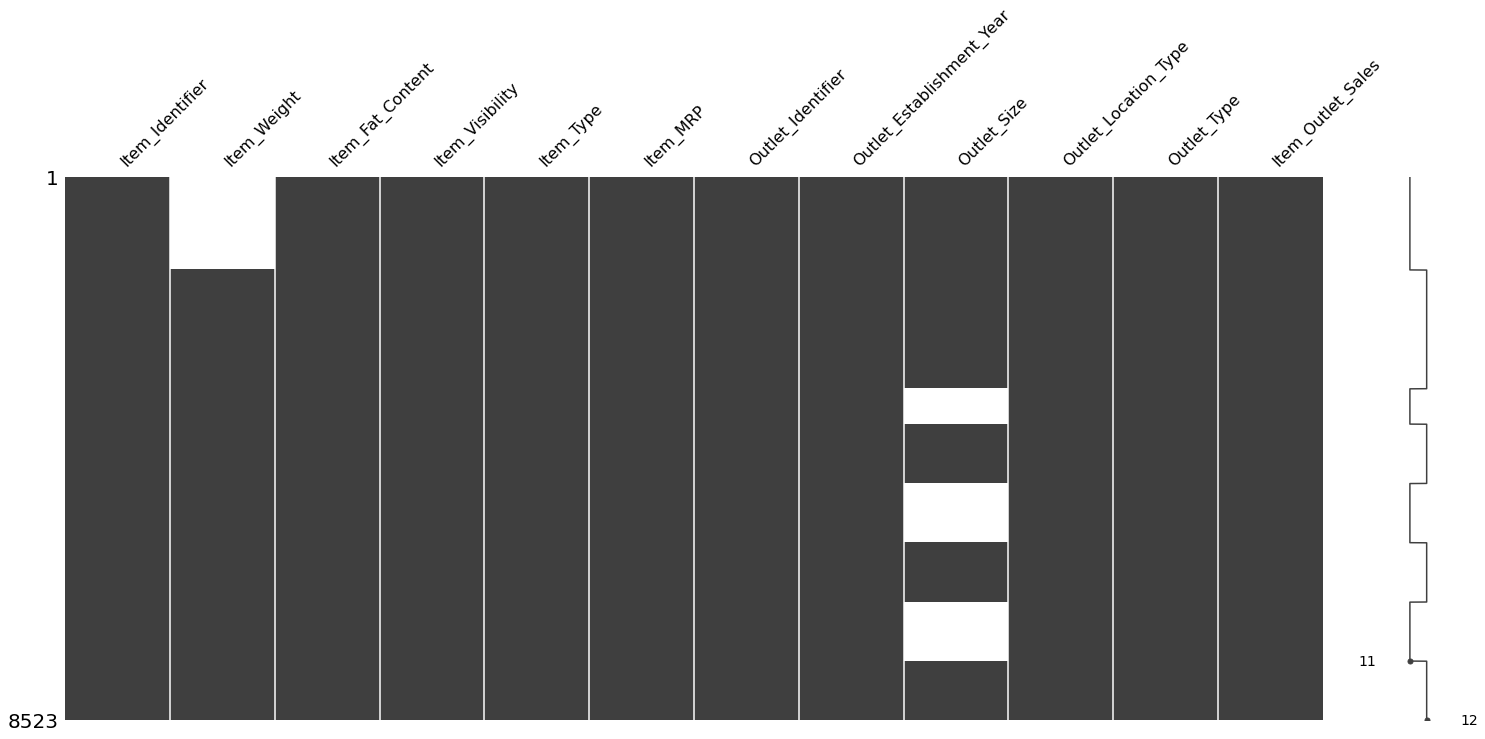

In [9]:
msno.matrix(sorteddf)  #after sorting

In [10]:
sorteddf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDF57,NaN,Regular,0.058543,Fruits and Vegetables,168.6448,OUT027,1985,Medium,Tier 3,Supermarket Type3,3408.8960
3697,DRM37,NaN,Low Fat,0.095931,Soft Drinks,198.5768,OUT027,1985,Medium,Tier 3,Supermarket Type3,6897.6880
3704,FDJ48,NaN,Low Fat,0.056162,Baking Goods,246.9118,OUT027,1985,Medium,Tier 3,Supermarket Type3,5681.2714
3705,FDY55,NaN,Low Fat,0.000000,Fruits and Vegetables,258.3988,OUT019,1985,Small,Tier 1,Grocery Store,256.9988
3706,NCI30,NaN,Low Fat,0.103188,Household,244.3460,OUT019,1985,Small,Tier 1,Grocery Store,246.3460
...,...,...,...,...,...,...,...,...,...,...,...,...
820,DRK01,7.63,Low Fat,0.061313,Soft Drinks,93.3436,OUT018,2009,Medium,Tier 3,Supermarket Type2,1323.6104
3806,FDA11,7.75,Low Fat,0.043415,Baking Goods,93.1436,OUT018,2009,Medium,Tier 3,Supermarket Type2,1418.1540
3801,FDH26,19.25,Regular,0.034841,Canned,141.1496,OUT018,2009,Medium,Tier 3,Supermarket Type2,282.2992
7647,DRQ35,9.30,Low Fat,0.042464,Hard Drinks,121.9388,OUT018,2009,Medium,Tier 3,Supermarket Type2,1114.5492


In [11]:
sorteddf = df.sort_values(by = 'Item_Type', ascending=True)   #sorting the data by its item type while ascending = True

In [12]:
sorteddf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8076,FDX23,6.445,Low Fat,0.029667,Baking Goods,94.4436,OUT013,1987,High,Tier 3,Supermarket Type1,1134.5232
3307,FDW36,11.150,Low Fat,0.056922,Baking Goods,107.1622,OUT035,2004,Small,Tier 2,Supermarket Type1,423.4488
1042,FDA23,9.800,Low Fat,0.047454,Baking Goods,101.7016,OUT017,2007,NaN,Tier 2,Supermarket Type1,1518.0240
1556,FDZ47,20.700,Regular,0.079296,Baking Goods,97.2042,OUT046,1997,Small,Tier 1,Supermarket Type1,1686.4714
2658,FDL36,15.100,Low Fat,0.076230,Baking Goods,90.4830,OUT045,2002,NaN,Tier 2,Supermarket Type1,1617.8940
...,...,...,...,...,...,...,...,...,...,...,...,...
3284,FDD11,NaN,Low Fat,0.030468,Starchy Foods,254.7040,OUT027,1985,Medium,Tier 3,Supermarket Type3,3036.0480
6676,FDG35,NaN,Regular,0.012328,Starchy Foods,173.8738,OUT019,1985,Small,Tier 1,Grocery Store,347.5476
8142,FDG47,12.800,Low Fat,0.116528,Starchy Foods,261.4252,OUT010,1998,NaN,Tier 3,Grocery Store,262.3252
627,FDE11,NaN,Regular,0.134442,Starchy Foods,183.9924,OUT027,1985,Medium,Tier 3,Supermarket Type3,6478.2340


In [13]:
sorteddf["Outlet_Size"].where(sorteddf["Outlet_Size"] == 'High').count()


932

In [14]:
sorteddf["Outlet_Size"].where(sorteddf["Outlet_Size"] == 'Medium').count()


2793

In [15]:
sorteddf["Outlet_Size"].where(sorteddf["Outlet_Size"] == 'Small').count()

2388

# **accourding to that, we'll be replacing all the missing outlet size values with the most frequently shown Size (Medium)**

In [16]:
sorteddf["Item_Weight"] = sorteddf.fillna(sorteddf["Item_Weight"].mean())    #Filling the missing weight values using the mean of the weights of the data
sorteddf["Outlet_Size"] = sorteddf.fillna("Medium")    #Filling the missing size values using the mean of the sizes of the data

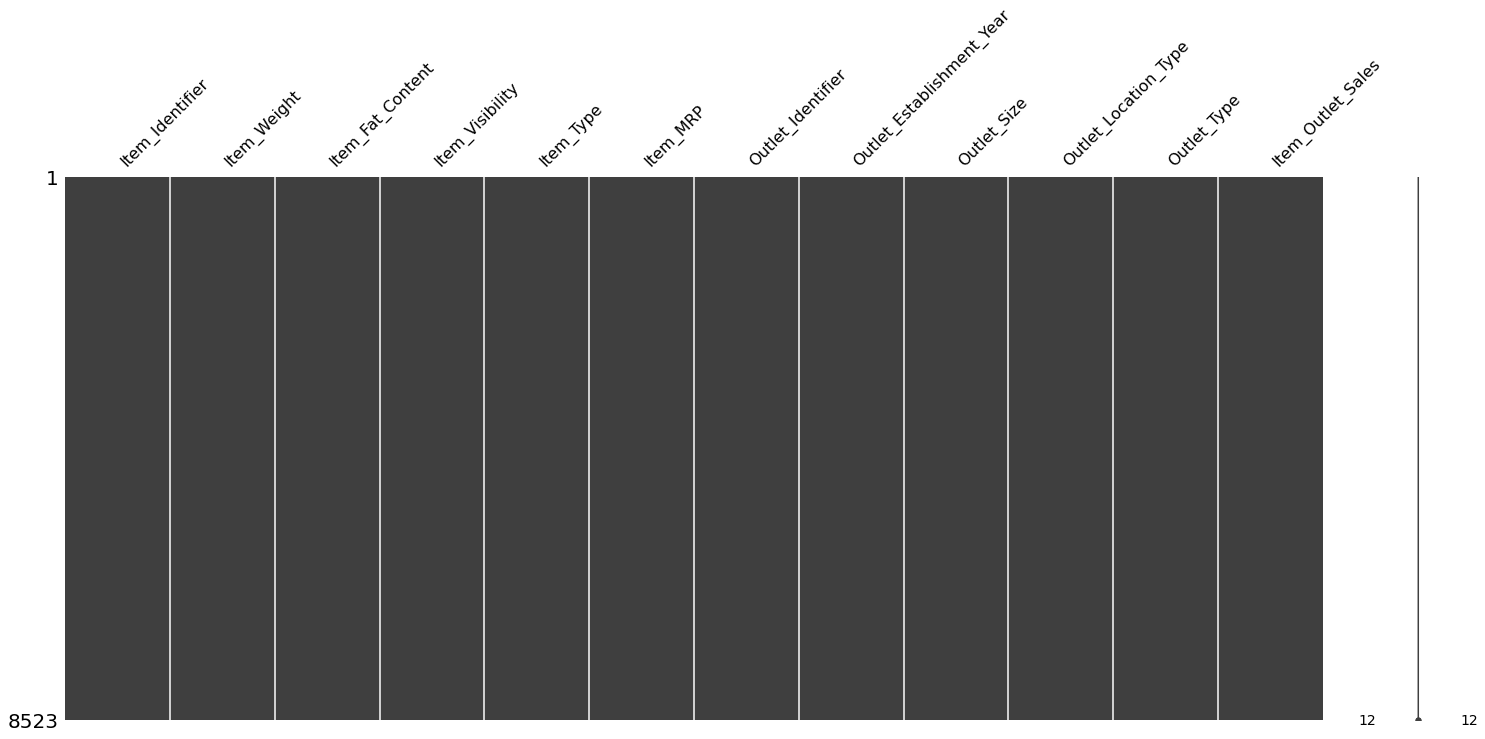

In [17]:
msno.matrix(sorteddf)  

# 

In [18]:
new_sorteddf = sorteddf.sort_values(by = 'Item_Identifier')

In [19]:
new_sorteddf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7415,DRA12,DRA12,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,DRA12,Tier 2,Supermarket Type1,2552.6772
1467,DRA12,DRA12,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,DRA12,Tier 2,Supermarket Type1,992.7078
4777,DRA12,DRA12,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,DRA12,Tier 3,Supermarket Type2,850.8924
8343,DRA12,DRA12,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,DRA12,Tier 2,Supermarket Type1,3829.0158
1482,DRA12,DRA12,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,DRA12,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
4363,NCZ54,NCZ54,Low Fat,0.000000,Household,161.5552,OUT010,1998,NCZ54,Tier 3,Grocery Store,324.9104
5522,NCZ54,NCZ54,Low Fat,0.082956,Household,164.0552,OUT027,1985,NCZ54,Tier 3,Supermarket Type3,5523.4768
4396,NCZ54,NCZ54,Low Fat,0.083528,Household,162.4552,OUT045,2002,NCZ54,Tier 2,Supermarket Type1,2274.3728
3508,NCZ54,NCZ54,Low Fat,0.083359,Household,161.9552,OUT046,1997,NCZ54,Tier 1,Supermarket Type1,4711.2008
